# Objective
- Build a classifier that will predict whether an IMDB review is positive or negative

# Set up - Install the libraries

In [1]:
! pip install nltk tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
import nltk

In [4]:
# Load the data
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [5]:
# import the moview review
from nltk.corpus import movie_reviews

### Load the IMDB dataset from nltk

In [7]:
# Load the text and labels
docs = [(movie_reviews.raw(fileid), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]

In [9]:
# COnvert to a dataframe
df = pd.DataFrame(docs, columns = ['review', 'sentiment'])
df['sentiment'] = df['sentiment'].map({'pos' : 1, 'neg': 0})
df.head()

,review,sentiment
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard's quick movie review \ndamn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' firs...",0
4,synopsis : a mentally unstable man undergoing ...,0


# Preprocess the data

In [30]:
# Split the data into the training/test 
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size = 0.3, random_state = 42)

In [31]:
# TF-IDF Vecotrizer
tfidf = TfidfVectorizer(stop_words = 'english', max_features = 5000)

In [32]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the machine learning Model

In [33]:
# Init the model
model = LogisticRegression(max_iter = 200)

In [34]:
# Fit the data - train the model
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

# Evaluate the model

In [35]:
y_pred = model.predict(X_test_tfidf)

In [36]:
# Check for the accuracy of my predictions
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.82


In [37]:
print("\nClassification report: \n", classification_report(y_test, y_pred))


Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       302
           1       0.81      0.83      0.82       298

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



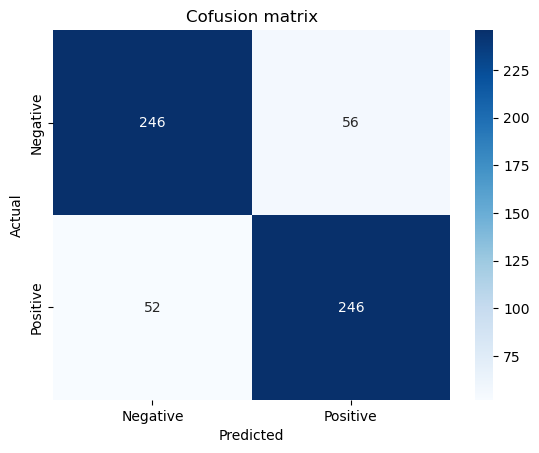

In [38]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Cofusion matrix")
plt.show()

# Predict on some custom input

In [43]:
sample = ['This movie was boring and I did not like at all']
# sample = ['this is am amazing movie I hope you all get to watch it']
sample_tfidf = tfidf.transform(sample)
print("Sentiment: ", "Positive" if model.predict(sample_tfidf)[0] else "Negative")

Sentiment:  Negative


# QA NLP demo

In [41]:
! pip install transformers

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.4 MB 985.5 kB/s eta 0:00:11
   ---- ----------------------------------- 1.0/10.4 MB 1.4 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/10.4 MB 1.9 MB/s eta 0:00:05
   ------------- -------------------------- 3.4/10.4 MB 2.7 MB/s eta 0:00:03
   -------------------- ------------------- 5.2/10.4 MB 3.6 MB/s eta 0:00:02
   ---------------------------------- ----- 8.9/10.4 MB 5.4 MB/s eta 0:00:01
   -----------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [44]:
# Import the transformers
from transformers import pipeline

In [46]:
! pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 985.5 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/376.0 MB 8.3 MB/s eta 0:00:45
   ---------------------------------------- 2.9/376.0 MB 7.3 MB/s eta 0:00:52
    --------------------------------------- 6.0/376

  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\AppData\\Roaming\\Python\\Python312\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Check the permissions.



   -- ------------------------------------- 22.5/376.0 MB 3.2 MB/s eta 0:01:53
   -- ------------------------------------- 23.3/376.0 MB 3.2 MB/s eta 0:01:51
   -- ------------------------------------- 24.6/376.0 MB 3.2 MB/s eta 0:01:49
   -- ------------------------------------- 25.7/376.0 MB 3.3 MB/s eta 0:01:47
   -- ------------------------------------- 25.7/376.0 MB 3.3 MB/s eta 0:01:47
   -- ------------------------------------- 26.0/376.0 MB 3.2 MB/s eta 0:01:51
   -- ------------------------------------- 26.0/376.0 MB 3.2 MB/s eta 0:01:51
   -- ------------------------------------- 26.0/376.0 MB 3.2 MB/s eta 0:01:51
   -- ------------------------------------- 26.7/376.0 MB 3.0 MB/s eta 0:01:57
   -- ------------------------------------- 27.3/376.0 MB 3.0 MB/s eta 0:01:57
   -- ------------------------------------- 28.0/376.0 MB 3.0 MB/s eta 0:01:56
   --- ------------------------------------ 28.6/376.0 MB 3.0 MB/s eta 0:01:56
   --- ------------------------------------ 29.1/376

In [49]:
# Load the pretrained pipelines
import tf_keras as keras
qa_pipeline = pipeline("question-answering")

ModuleNotFoundError: No module named 'tf_keras'